In [ ]:
#getting 2000 samples randomly from validation set and their corresponding bounding boxes, 
# Sorry for absolute pathes:))
'''
import xml.etree.ElementTree as ET
import os
import glob
from random import sample
aaa = 0
bbb = 0
####################################################################################################

# In this chunk of code I simply remove xml files that have more than 1 bounding boxes!
# This '/home/mallet/Downloads/val/*.xml' path is 
# referring to bounding boxes for all 50k images of validation set in image net. 
# 11715 images out of this 50k has more than 1 bounding boxes.

val_files = glob.glob('/home/mallet/Downloads/val/*.xml')
filcounter = 0
for file in val_files:
    root = ET.parse(file).getroot()
    bnbxcntr = 0
    for bnd in root.findall('./object/bndbox'):
        bnbxcntr+=1
    if bnbxcntr>1:
        os.remove(file)
        filcounter+=1
print(filcounter)

####################################################################################################

# In this chunck, I am removing those 11715 images from imageset as well,
# since I removed their BB in last section. This '/home/mallet/Desktop/VanillaVsARobust/valid/' refers
# to all 50k images of validation set that I want to remove 11715 of them. 
# And this '/home/mallet/Downloads/val/*.xml' is simply those xml files that I obtained in previous section
# after removing those 11715!

flss = os.listdir('/home/mallet/Desktop/VanillaVsARobust/valid/')
bbfiles = glob.glob('/home/mallet/Downloads/val/*.xml')
print(type(bbfiles))
for fls in flss:
    files = os.listdir('/home/mallet/Desktop/VanillaVsARobust/valid/'+fls)
    for file in files:
        d = '/home/mallet/Downloads/val/' + file.split(".")[0] + '.xml'
        if d in bbfiles:
            aaa+=1
        else:
            os.remove('/home/mallet/Desktop/VanillaVsARobust/valid/'+fls+'/'+file)
            bbb+=1
print(aaa, bbb)
####################################################################################################

# After previous 2 steps, now I have 2 set of 38285 in both Jpeg and xml. now I randomly keep 2 images from
# each category/class which will result in having 2000 images and removing 36285 images.

asa = 0
flss = os.listdir('/home/mallet/Desktop/VanillaVsARobust/valid/')
bbfiles = glob.glob('/home/mallet/Downloads/val/*.xml')
for fls in flss:
    files = os.listdir('/home/mallet/Desktop/VanillaVsARobust/valid/'+fls)
    for file in sample(files,len(files)-2):
        #d = '/home/mallet/Downloads/val/' + file.split(".")[0] + '.xml'
        os.remove('/home/mallet/Desktop/VanillaVsARobust/valid/'+fls+'/'+file)
        os.remove('/home/mallet/Desktop/VanillaVsARobust/bb/'+file.split(".")[0] + '.xml')
        asa+=1   
print(asa)
'''

In [28]:
import torchvision.transforms as transforms
import torchray.benchmark
# Transforms 
val_transforms = transforms.Compose([transforms.Resize(256),transforms.CenterCrop(224), 
    transforms.ToTensor()])    

# Loading images and their labels 
vall = torchray.benchmark.datasets.ImageFolder('/home/mallet/Desktop/VanillaVsARobust/validationSample',
                                               transform = val_transforms)

##################################################################################################
# since I saved every image in their category label with the code of "n0...", when Using ImageFolder,
# They will get loaded correctly based on 0...999 category that starts with tench and ends with toilet paper!
# in below we see example of Image ILSVRC2012_val_00039476.JPEG which is a cat playing with toilet paper which
# which is in toilet paper class id 999!
# Note: had to remove normalization in val

In [29]:
print(vall.get_image_url(1998))
print(vall[1998])

/home/mallet/Desktop/VanillaVsARobust/validationSample/n15075141/ILSVRC2012_val_00039476.JPEG
(tensor([[[0.5529, 0.5569, 0.5569,  ..., 0.7451, 0.7490, 0.7490],
         [0.5569, 0.5529, 0.5569,  ..., 0.7608, 0.7608, 0.7529],
         [0.5608, 0.5608, 0.5765,  ..., 0.7451, 0.7490, 0.7451],
         ...,
         [0.3647, 0.3765, 0.3765,  ..., 0.7686, 0.7569, 0.7451],
         [0.3882, 0.3882, 0.3765,  ..., 0.7569, 0.7451, 0.7373],
         [0.3608, 0.3725, 0.3686,  ..., 0.7333, 0.7294, 0.7333]],

        [[0.4941, 0.4980, 0.4863,  ..., 0.6745, 0.6745, 0.6667],
         [0.4902, 0.4980, 0.5020,  ..., 0.6549, 0.6510, 0.6510],
         [0.4980, 0.5020, 0.5098,  ..., 0.6549, 0.6510, 0.6549],
         ...,
         [0.3216, 0.3098, 0.2980,  ..., 0.6549, 0.6510, 0.6392],
         [0.2941, 0.2902, 0.3020,  ..., 0.6392, 0.6353, 0.6275],
         [0.3059, 0.3020, 0.3098,  ..., 0.6392, 0.6353, 0.6235]],

        [[0.2510, 0.2471, 0.2157,  ..., 0.4824, 0.4745, 0.4824],
         [0.2471, 0.2510, 0.

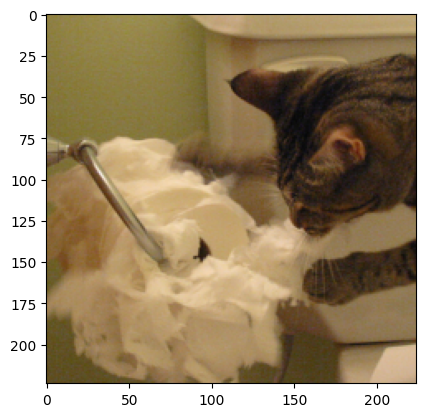

In [30]:

from matplotlib import pyplot as plt
plt.imshow(  vall[1998][0].permute(1, 2, 0)  )
plt.show()